In [5]:
import numpy as np
import cv2 

image = cv2.imread("image.png")

In [6]:
ball_filter = np.array([
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0],
    [0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 1],
    [0, 1, 9, 10, 10, 10, 10, 10, 9, 1, 1],
    [0, 1, 9, 10, 11, 11, 11, 10, 9, 1, 1],
    [0, 1, 9, 10, 11, 11, 11, 10, 9, 1, 1],
    [0, 1, 9, 10, 11, 11, 11, 10, 9, 1, 1],
    [0, 1, 9, 10, 10, 10, 10, 10, 9, 1, 1],
    [0, 0, 9, 9, 9, 9, 9, 9, 9, 0, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
])

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.blur(image, (7, 7))
padded = np.pad(image, 5)
output = np.copy(image)
output = np.astype(output, np.float32)

In [8]:
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        region = padded[i:i+11, j:j+11]
        results = region * ball_filter
        output[i, j] = np.sum(results)

In [9]:
output_copy = np.copy(output)
print(np.max(output))
print(np.mean(output))

134130.0
70637.94


In [10]:
output_copy = output / np.max(output) * 255
np.max(output_copy)
np.mean(output_copy)

np.float32(134.29263)

In [14]:
transformed = np.where(output_copy >= 200, 255, 0)
transformed = transformed.astype(np.uint8)

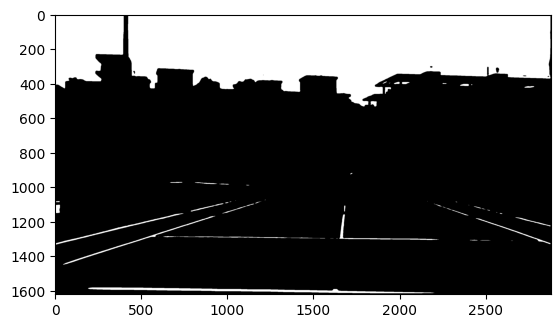

In [15]:
import matplotlib.pyplot as plt
plt.imshow(transformed, cmap="gray")
plt.show()